Circuit RLC : http://www.physagreg.fr/electrocinetique-3-rlc.php

l'équa diff : LC d2U/dt2 + RC dU/dt + U = E

Solution Générale sans second membre (Eutde du régime libre)
LC d2U/dt2 + RC dU/dt + U = 0

à ce moment là .. U = A exp(rt)

LC r2 u + RC r u + u = 0 ⟺ r2 + R/L r +1/(LC) = 0

du coup delta ... 
Ah ça depend du signe ... 
0 , X0 ou x1 et x2

pour faciliter l'histoire ... 

w0 = 1/sqrt(LC)       :  pulsation propre
lambda = R/(2L)       :  Facteur d'amortissement
alpha = lambda /w0    :  Coeff d'amortissement
alpha = R/2 sqrt(C/L)

Q = 1/(2alpha) = Lw0/R = 1/(RCw0) : Facteur de qualité

au final on peut re écrire l'équation du second dégrée


r2 + 2λr + ω0^2 =0    ou   r2 + 2αω0 r + ω0^2 = 0

Δ′= λ2−ω20   ou   Δ′=ω20  (α2−1)

Δ′ > 0 => 2 sol ...

r1 = -λ + sqrt(λ^2 - ω0 ^2) = - α ω0 + ω0 sqrt(α^2 -1)

r2 = -λ - sqrt(λ^2 - ω0 ^2) = - α ω0 - ω0 sqrt(α^2 -1)

du coup on a : u(t)=A1 exp(r1 t) + A2 exp(r2 t)

Détermination des constantes

On peut utiliser les conditions initiales pour expliciter les constantes A1 et A2. C’est parce que le circuit est du deuxième ordre qu’existent ces deux constantes et qu’il faut deux conditions initiales pour les déterminer.

La continuité de la tension aux bornes du condensateur implique que u(t=0)=E.
La continuité de l’intensité dans la bobine implique que i(t=0)=0.
On obtient alors deux équations à deux inconnues qui nous permettent de déterminer A1 et A2 :

u(t=0)=A1+A2=E

i(t=0)=r1A1+r2A2=0

blablabla : 
A1 = r2 E / (r2 -r1 )

A2 = - r1 E / (r2 - r1)

au final : 

U(t) = r2 E / (r2 -r1 ) exp(r1 t) - r1 E / (r2 - r1) exp(r2 t)

Régime pseudo-périodique : Δ′<0
Le polynôme admet deux racines complexes conjuguées. Si on pose ω2=−Δ′, on a :

r1=−λ+jω              r2=−λ−jω


u1(t)=e(r1 t)=e(−λ+jω)t et u2 = e(r2 t) = exp(−λ−jω)t donnent 

u(t)=C1 exp(r1 t)+C2 exp(r2 t)

<IPython.core.display.Javascript object>


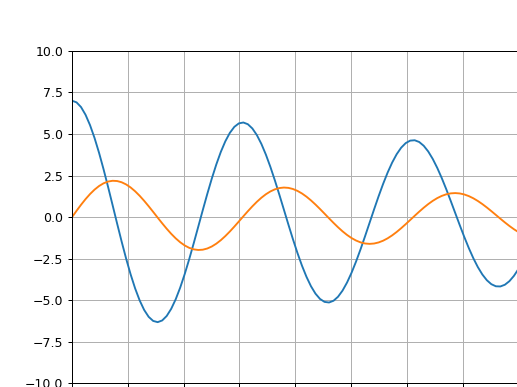

interactive(children=(FloatSlider(value=200.0, description='Rs', max=1000.0, step=10.0), FloatSlider(value=500…

In [38]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt


R = 200 
C = 500
L = 500
E = 7
endTime = 0.4
t = np.linspace(0.0, endTime,100)

w = 1/np.sqrt(L*C)
l = R/(2*L)
a = l/w
Q = 1/(2*a)

r1 = -l + np.sqrt(l*l -w*w)
r2 = -l - np.sqrt(l*l -w*w)

A1 = r2*E/(r2-r1)
A2 = -r1*E/(r2-r1)

U = A1*np.exp(r1*t) + A2 *np.exp(r2*t)
I = r2*r1*E*C / (r2 - r1) * (np.exp(r1*t) - np.exp(r2*t))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid()
ax.axis([0, endTime, -10, 10])

ULine,  = ax.plot(t, U , label = 'Tension')
ILine,  = ax.plot(t, I , label = 'Courant')

def update(Rs = R, Ls = L, Cs=C, Es =E):
    L = Ls /100
    C = Cs /1000000
    R = Rs
    
    w = 1/np.sqrt(L*C)
    print("pusation: " + str(w))
    l = R/(2*L)
    a = l/w
    Q = 1/(2*a)
    print("Q: " + str(Q))

    delta = l*l-w*w
    print("delta: " + str(delta))
    if (delta > 0):
        r1 = -l + np.sqrt(l*l -w*w)
        r2 = -l - np.sqrt(l*l -w*w)

        A1 = r2*Es/(r2-r1)
        A2 = -r1*Es/(r2-r1)

        U = A1*np.exp(r1*t) + A2 *np.exp(r2*t)
        I = r2*r1*E*C / (r2 - r1) * (np.exp(r1*t) - np.exp(r2*t))
    else :
        
        A1 = E
        A2 = l/w*E
        U = (A1*np.cos(w*t) + A2 *np.sin(w*t))*np.exp(-l*t)
        I = E * C / w * (w*w+l*l) * np.exp(-l*t)*np.sin(w*t)
        
    I = I *100
    
    ULine.set_ydata(U)
    ILine.set_ydata(I)



interact(update,
         Rs=widgets.FloatSlider(min=0, max=1000, step=10, value=R),
         Ls=widgets.FloatSlider(min=0, max=1000, step=10, value=L),
         Cs=widgets.FloatSlider(min=0, max=1000, step=10, value=C),
         Es=widgets.FloatSlider(min=0, max=20.0, step= 0.1, value=E),
         );